In [1]:
from cuml.decomposition import PCA

import os
import pandas as pd

import cudf
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
drd2_path = 'tsne_data/drd2_release_vs_reinvent.csv'

In [4]:
df_drd2 = pd.read_csv(drd2_path)

In [5]:
df_drd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176454 entries, 0 to 176453
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tsne_x     176454 non-null  float64
 1   tsne_y     176454 non-null  float64
 2   Dataset_n  176454 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 4.0 MB


In [6]:
df_drd2.groupby(['Dataset_n']).count()

,tsne_x,tsne_y
Dataset_n,,
0,8359,8359
1,9050,9050
2,9048,9048
3,149997,149997


In [7]:
df_scd1.groupby(['Dataset_n']).count()

,tsne_x,tsne_y
Dataset_n,,
0,1000,1000
1,1000,1000
2,642,642
3,80000,80000


In [8]:
'''
For DRD2 data:
3: chembl
0: training
1: REINVENT
2: ReLeaSE

for SCD1:
3: chembl
0: REINVENT
1: ReLeaSE
2: training
'''

'\nFor DRD2 data:\n3: chembl\n0: training\n1: REINVENT\n2: ReLeaSE\n\nfor SCD1:\n3: chembl\n0: REINVENT\n1: ReLeaSE\n2: training\n'

In [9]:
# separate release and reinvent
drd2_rel = df_drd2[(df_drd2['Dataset_n'] == 2)]
drd2_rein = df_drd2[(df_drd2['Dataset_n'] == 1)]

scd1_rel = df_scd1[(df_scd1['Dataset_n'] == 1)]
scd1_rein = df_scd1[(df_scd1['Dataset_n'] == 0)]

### Plot 2D Histograms for SCD1

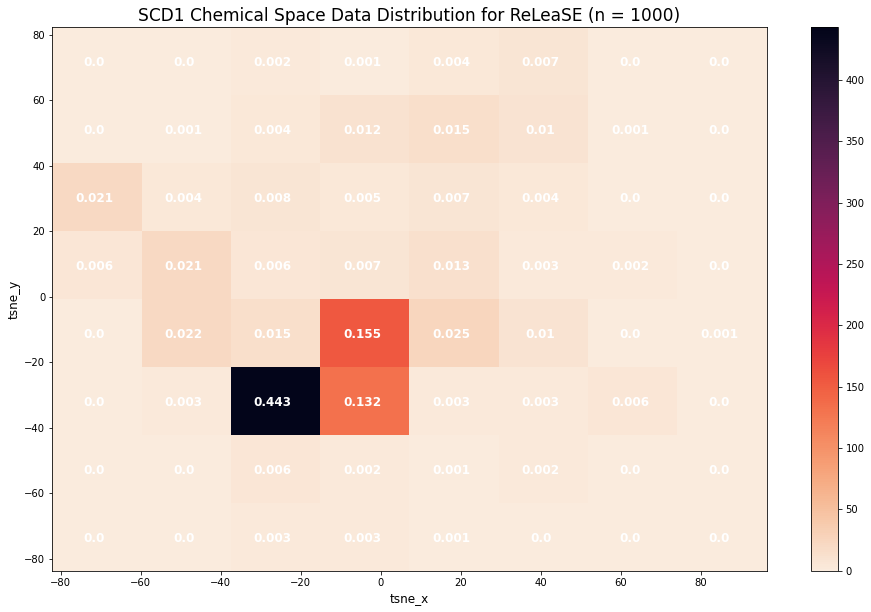

In [32]:
plt.figure(figsize = (16,10))

hist, xbins, ybins, im = plt.hist2d(data = scd1_rel, bins = 8, x = 'tsne_x', y = 'tsne_y', cmap = 'rocket_r')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        plt.text(xbins[j] + 10.5, ybins[i] + 10, round((hist[j,i]/1000), 3),
                     color = "w", ha = "center", va = "center", fontsize = 12, fontweight = "bold")

plt.title('SCD1 Chemical Space Data Distribution for ReLeaSE (n = 1000)', fontdict = {'fontsize': 17})
plt.xlabel('tsne_x',fontdict = {'fontsize': 12})
plt.ylabel('tsne_y',fontdict = {'fontsize': 12})
plt.colorbar()

plt.savefig('images/2Dhist/release_scd1_2D_hist.png')

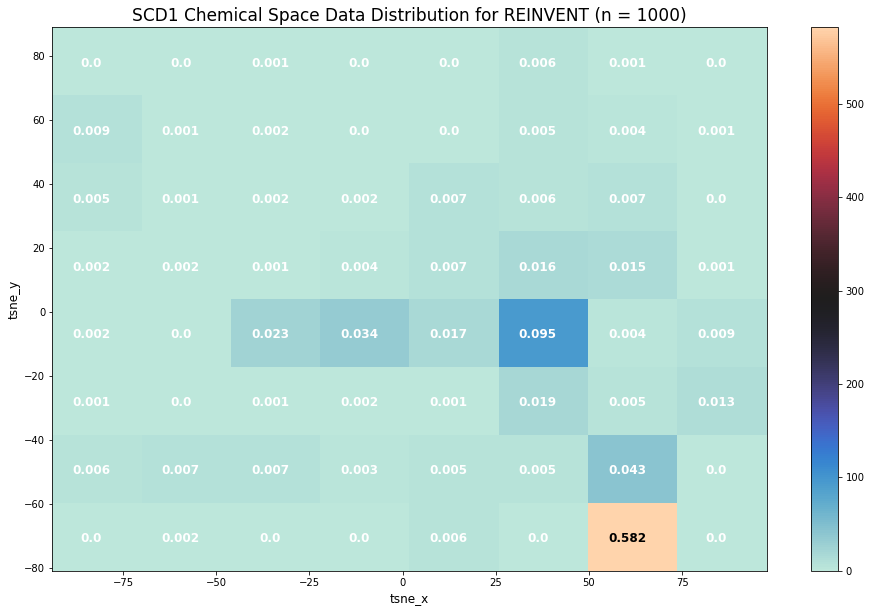

In [31]:
plt.figure(figsize = (16,10))

hist, xbins, ybins, im = plt.hist2d(data = scd1_rein, bins = 8, x = 'tsne_x', y = 'tsne_y', cmap = 'icefire')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if hist[j,i] < 300:
            plt.text(xbins[j] + 10.5, ybins[i] + 10, round((hist[j,i]/1000), 3),
                     color = "w", ha = "center", va = "center", fontsize = 12, fontweight = "bold")
        else:
            plt.text(xbins[j] + 10.5, ybins[i] + 10, round((hist[j,i]/1000), 3),
                     color = "k", ha = "center", va = "center", fontweight = "bold", fontsize = 12)

plt.title('SCD1 Chemical Space Data Distribution for REINVENT (n = 1000)', fontdict = {'fontsize': 17})
plt.xlabel('tsne_x',fontdict = {'fontsize': 12})
plt.ylabel('tsne_y',fontdict = {'fontsize': 12})
plt.colorbar()

plt.savefig('images/2Dhist/reinvent_scd1_2D_hist.png')

### Plot 2D Histograms for DRD2

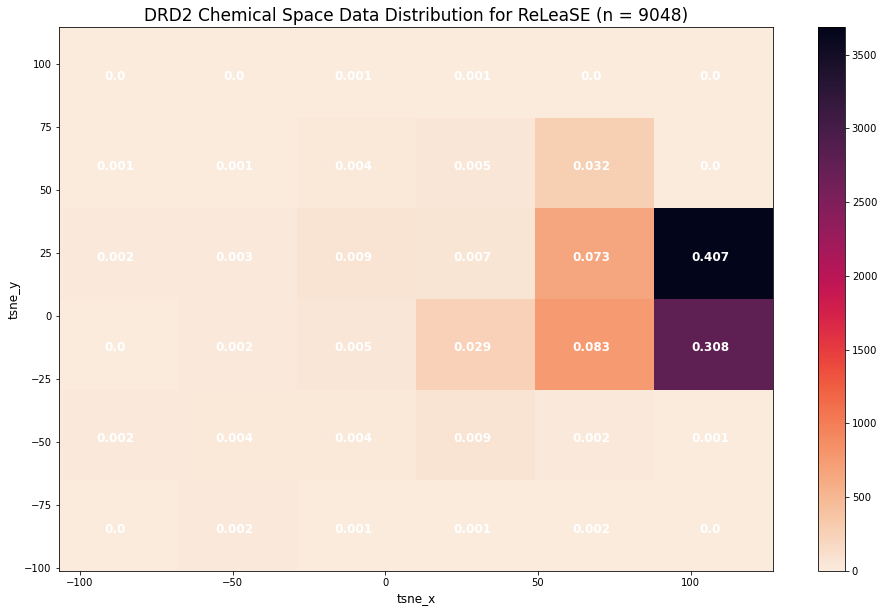

In [30]:
plt.figure(figsize = (16,10))

hist, xbins, ybins, im = plt.hist2d(data = drd2_rel, bins = 6, x = 'tsne_x', y = 'tsne_y', cmap = 'rocket_r')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        plt.text(xbins[j] + 18.5, ybins[i] + 16.5, round((hist[j,i]/9048), 3),
                     color = "w", ha = "center", va = "center", fontsize = 12, fontweight = "bold")
        
plt.title('DRD2 Chemical Space Data Distribution for ReLeaSE (n = 9048)', fontdict = {'fontsize': 17})
plt.xlabel('tsne_x',fontdict = {'fontsize': 12})
plt.ylabel('tsne_y',fontdict = {'fontsize': 12})
        
plt.colorbar()

plt.savefig('images/2Dhist/release_drd2_2D_hist.png')

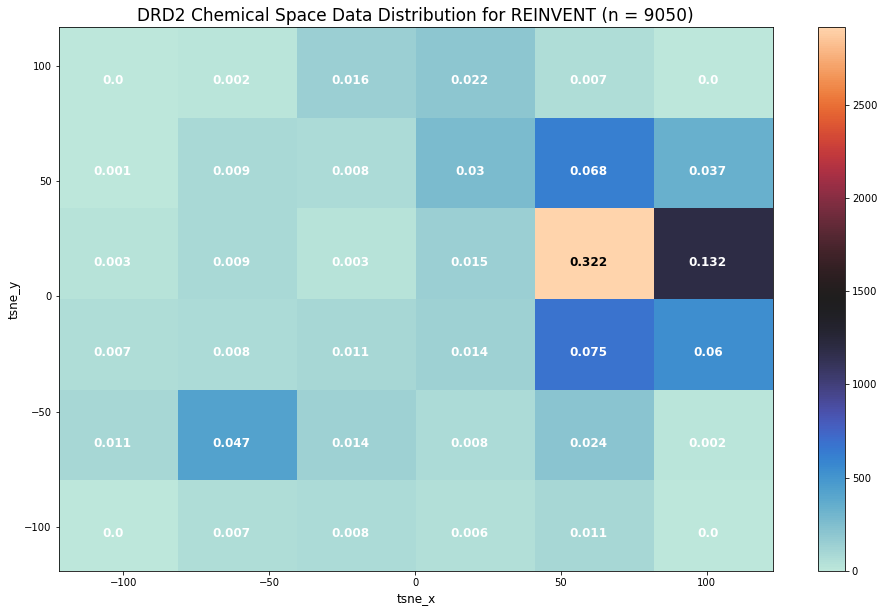

In [29]:
plt.figure(figsize = (16,10))

hist, xbins, ybins, im = plt.hist2d(data = drd2_rein, bins = 6, x = 'tsne_x', y = 'tsne_y', cmap = 'icefire')

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        if hist[j,i] < 2500:
            plt.text(xbins[j] + 18.5, ybins[i] + 16, round((hist[j,i]/9050), 3),
                     color = "w", ha = "center", va = "center", fontsize = 12, fontweight = "bold")
        else:
            plt.text(xbins[j] + 18.5, ybins[i] + 16, round((hist[j,i]/9050), 3),
                     color = "k", ha = "center", va = "center", fontsize = 12, fontweight = "bold")
        
plt.title('DRD2 Chemical Space Data Distribution for REINVENT (n = 9050)', fontdict = {'fontsize': 17})
plt.xlabel('tsne_x',fontdict = {'fontsize': 12})
plt.ylabel('tsne_y',fontdict = {'fontsize': 12})
plt.colorbar()

plt.savefig('images/2Dhist/reinvent_drd2_2D_hist.png')